In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# from keras.utils import np_utils
from tqdm import tqdm_notebook

In [2]:
data = pd.read_csv('Data/A_Z Handwritten Data.csv').astype('float32')

In [3]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = data.drop('0', axis = 1)
y = data['0']

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

In [6]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [7]:
word_dict = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J',
    10:'K',
    11:'L',
    12:'M',
    13:'N',
    14:'O',
    15:'P',
    16:'Q',
    17:'R',
    18:'S',
    19:'T',
    20:'U',
    21:'V',
    22:'W',
    23:'X', 
    24:'Y',
    25:'Z'
}

In [8]:
# Plotting the number of alphabets in the dataset...

train_yint = np.intp(y)
count = np.zeros(26, dtype = 'int')

for i in train_yint:
    count[i] += 1

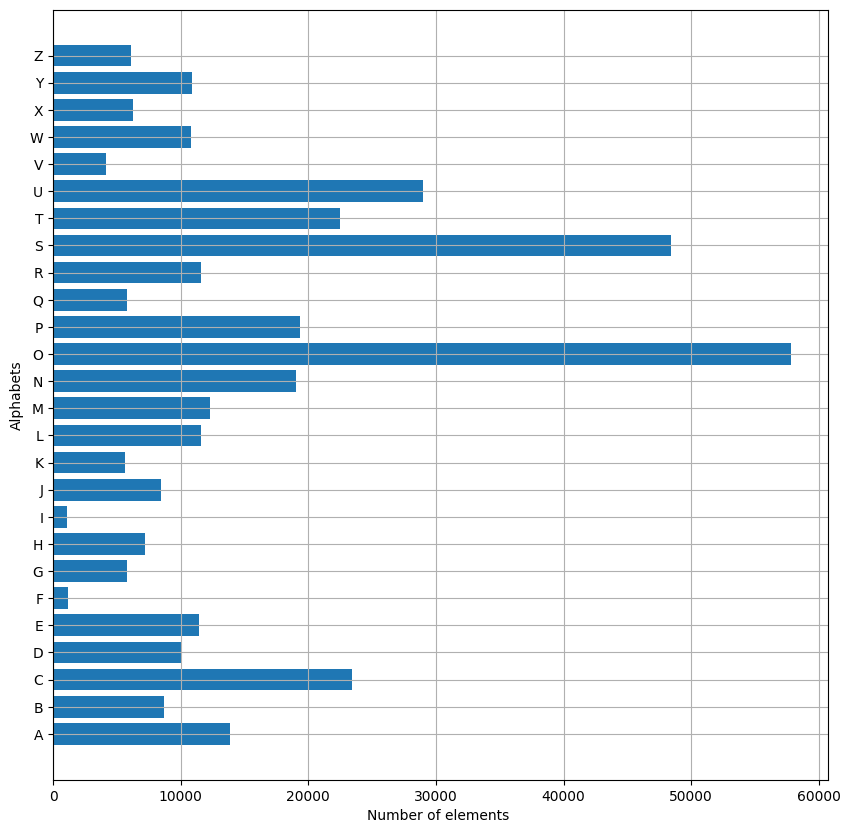

In [9]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

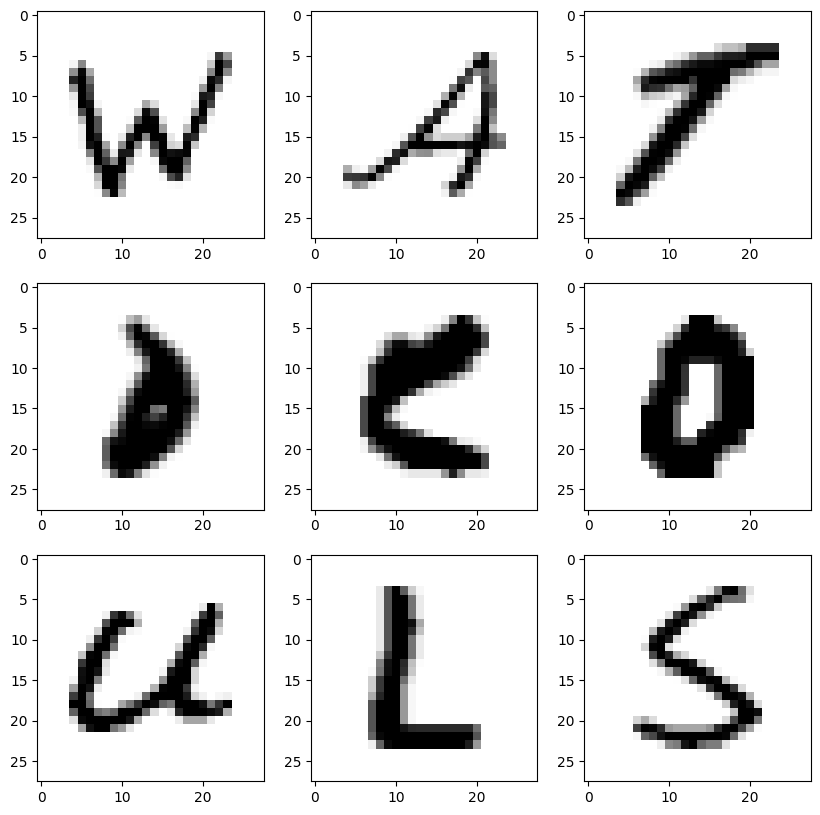

In [64]:
# Shuffling the data ...

shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize = (10, 10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = "Greys")
    
plt.show()

In [11]:
# Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [12]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype = 'int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype = 'int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [13]:
X_train = train_x.reshape(train_x.shape[0], -1)
X_test = test_x.reshape(test_x.shape[0], -1)

## CNN Model

In [75]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Flatten())

model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(26, activation = "softmax"))


In [76]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, min_lr = 0.0001)
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 2, verbose = 0, mode = 'auto')

In [77]:
history = model.fit(train_X, train_yOHE, epochs = 10, callbacks = [reduce_lr, early_stop], validation_data = (test_X, test_yOHE))

Epoch 1/10


2023-07-25 12:20:46.012404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-25 12:20:46.213619: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


9312/9312 [==============================] - ETA: 0s - loss: 532.4141 - accuracy: 0.9166

2023-07-25 12:22:34.164967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9312/9312 [==============================] - 121s 13ms/step - loss: 532.4141 - accuracy: 0.9166 - val_loss: 1391.2383 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 2/10
9312/9312 [==============================] - 110s 12ms/step - loss: 3385.1077 - accuracy: 0.9642 - val_loss: 10689.6387 - val_accuracy: 0.9483 - lr: 0.0010
Epoch 3/10
9312/9312 [==============================] - 115s 12ms/step - loss: 2521.3582 - accuracy: 0.9828 - val_loss: 2502.2698 - val_accuracy: 0.9815 - lr: 2.0000e-04


In [78]:
model.summary()
model.save(r'Model')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

INFO:tensorflow:Assets written to: Model/assets


In [79]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9551618099212646, 0.948261559009552, 0.9815143346786499]
The training accuracy is : [0.9166163206100464, 0.9641697406768799, 0.9827560782432556]
The validation loss is : [1391.23828125, 10689.638671875, 2502.269775390625]
The training loss is : [532.4141235351562, 3385.107666015625, 2521.358154296875]


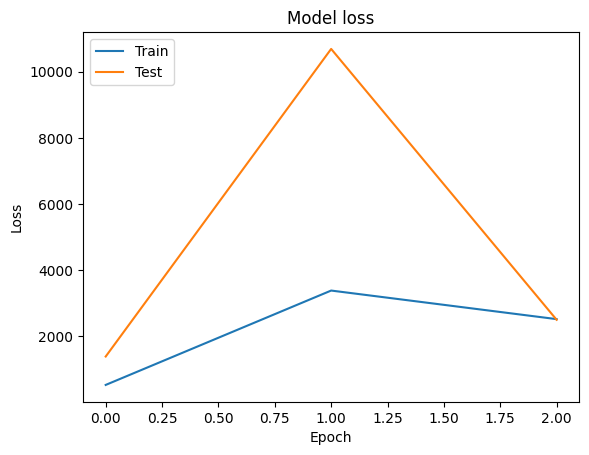

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

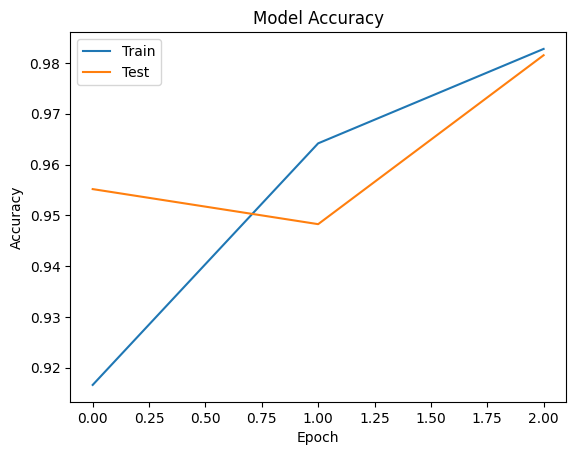

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Load Model

In [16]:
model = load_model('Model')

In [17]:
# Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)

2023-07-25 09:50:23.165867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 547ms/step
(74490, 28, 28, 1)


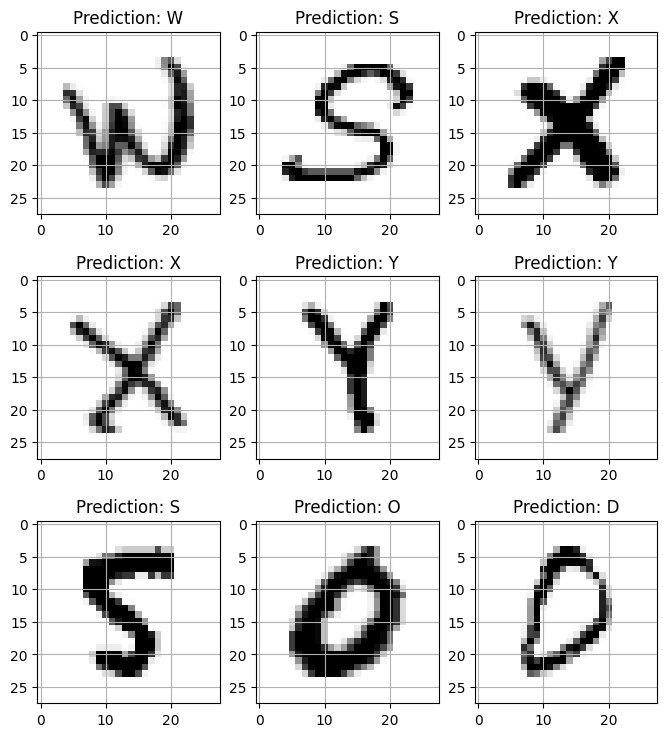

In [98]:
# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3, 3, figsize = (8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap = "Greys")
    pred_label = word_dict[np.argmax(pred[i])]
    ax.set_title("Prediction: " + pred_label)
    ax.grid()

In [99]:
# Prediction on external image...

img = cv2.imread(r'./Data/Testing/img_A.jpg')
img_copy = img.copy()

# img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28, 28))
img_final = np.reshape(img_final, (1, 28, 28, 1))

img_pred = word_dict[np.argmax(model.predict(img_final))]

print(img_pred)

1/1 [==============================] - 0s 56ms/step
A
